<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9D%B4%ED%95%B4_%EC%8B%A4%EC%8A%B5/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_11%EC%B0%A8%EC%8B%9C_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#바뀐 함수는 아래의 링크를 참조하여 보세요.
#https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [ ]:
from konlpy.tag import Komoran
tagger = Komoran()  # 형태소 분석기
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
import requests
import lxml.html
import codecs

#투캅스 시나리오 읽어오기
#이 시나리오 데이터는 제공되어질수 없으며 배포가 불가능하오니
#http://www.korean.go.kr(국립국어원)에서 회원가입을 하시고 다운을 받아주세요.
articles = []
fp = codecs.open("골프.txt", "r", encoding="utf-8")
soup = BeautifulSoup(fp, "html.parser")
#body = soup.select_one("body")  #tag에 body가 있으면 추가합니다.
text = soup.get_text()
articles = text.split("\n")
len(articles)
fp.close()

from sklearn.feature_extraction.text import TfidfVectorizer

#명사만 추출
def get_noun(text):
    nouns = tagger.nouns(text)
    return [n for n in nouns if len(n) > 1]  # 2글자 이상인 명사만 추출



In [ ]:
#TF-IDF 행렬구하기
cv = TfidfVectorizer(tokenizer=get_noun, max_features=100) # 개수는 마음대로 정해도 됨
tdm = cv.fit_transform(articles)

#print(tdm.toarray())
#print(tdm)

import numpy
import operator
words = cv.get_feature_names() # word를 추출할 수 있음
count_mat = tdm.sum(axis=0) # 단어별로 count를 정리함
count = numpy.squeeze(numpy.asarray(count_mat))
word_count = list(zip(words, count))
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
word_count

hot_key = list(dict(word_count[:50]).keys())
hot_key


['골프',
 '리조트',
 '코스',
 '골프장',
 '클럽',
 '컨트리',
 '맛집',
 '여행',
 '호텔',
 '라운딩',
 '.com',
 '비치',
 '바다',
 '객실',
 '위치',
 '!!',
 '장흥',
 '시간',
 '다운',
 '사진',
 '패키지',
 '그린',
 '예약',
 '추천',
 '회원권',
 '하우스',
 '정남진',
 '식당',
 '자연',
 '정도',
 '생각',
 '투어',
 '거리',
 '가족',
 '이용',
 '사람',
 '느낌',
 '국내',
 '회원',
 '음식',
 '시작',
 '소개',
 '때문',
 '시설',
 '카페',
 '지역',
 '주변',
 '여수',
 '최고',
 '서울']

In [ ]:
word_count

[('골프', 69.8345925324755),
 ('리조트', 51.62774520317098),
 ('코스', 38.67101172798554),
 ('골프장', 35.541053501375906),
 ('클럽', 33.5806970274515),
 ('컨트리', 32.33228224855066),
 ('맛집', 31.02976564387717),
 ('여행', 29.023894714192796),
 ('호텔', 20.968504755195056),
 ('라운딩', 19.40658888654065),
 ('.com', 19.20953390490378),
 ('비치', 18.67927367501948),
 ('바다', 15.075847427083032),
 ('객실', 14.201920308749408),
 ('위치', 14.105284219799318),
 ('!!', 13.880192360745706),
 ('장흥', 13.855364402928886),
 ('시간', 13.708208942621628),
 ('다운', 13.550444691378686),
 ('사진', 12.984660490805473),
 ('패키지', 12.941120141394627),
 ('그린', 12.834558665730613),
 ('예약', 12.44383857403487),
 ('추천', 11.94209269952651),
 ('회원권', 11.668624306984007),
 ('하우스', 11.519836747409949),
 ('정남진', 11.283152497461659),
 ('식당', 10.820837240129915),
 ('자연', 10.553299303544817),
 ('정도', 10.330246738835985),
 ('생각', 10.278112222092489),
 ('투어', 10.145913183061888),
 ('거리', 10.069586135023643),
 ('가족', 9.812865076676848),
 ('이용', 9.78078252

In [ ]:
word_count

[('골프', 69.8345925324755),
 ('리조트', 51.62774520317098),
 ('코스', 38.67101172798554),
 ('골프장', 35.541053501375906),
 ('클럽', 33.5806970274515),
 ('컨트리', 32.33228224855066),
 ('맛집', 31.02976564387717),
 ('여행', 29.023894714192796),
 ('호텔', 20.968504755195056),
 ('라운딩', 19.40658888654065),
 ('.com', 19.20953390490378),
 ('비치', 18.67927367501948),
 ('바다', 15.075847427083032),
 ('객실', 14.201920308749408),
 ('위치', 14.105284219799318),
 ('!!', 13.880192360745706),
 ('장흥', 13.855364402928886),
 ('시간', 13.708208942621628),
 ('다운', 13.550444691378686),
 ('사진', 12.984660490805473),
 ('패키지', 12.941120141394627),
 ('그린', 12.834558665730613),
 ('예약', 12.44383857403487),
 ('추천', 11.94209269952651),
 ('회원권', 11.668624306984007),
 ('하우스', 11.519836747409949),
 ('정남진', 11.283152497461659),
 ('식당', 10.820837240129915),
 ('자연', 10.553299303544817),
 ('정도', 10.330246738835985),
 ('생각', 10.278112222092489),
 ('투어', 10.145913183061888),
 ('거리', 10.069586135023643),
 ('가족', 9.812865076676848),
 ('이용', 9.78078252

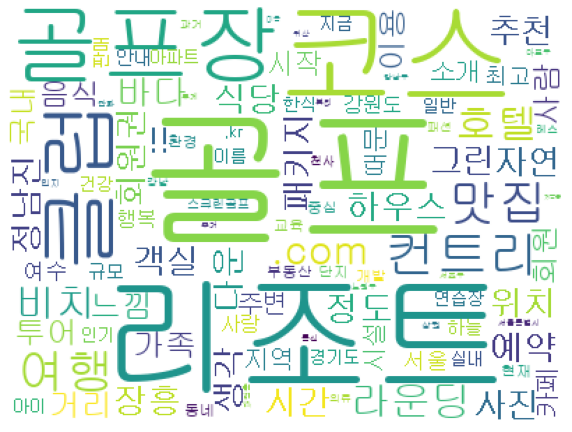

In [ ]:
#word cloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wc = WordCloud(font_path='C:\\Windows\\Fonts\\NGULIM.ttf', background_color='white', width=400, height=300)
cloud = wc.fit_words(dict(word_count))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
#형태소 분석기 라이브러리 로딩
import codecs
from konlpy.tag import Okt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# 텍스트를 처리하기
tagger = Okt()
results = []
lines = articles
words_all = []

for line in lines:
    # 형태소 분석하기
    malist = tagger.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 명사/동사/형용사만 걸러내기
        if word[1] in ['Noun','Verb','Adjective']:
            r.append(word[0])
            words_all.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    #print(rl)

# 파일로 저장하기
from gensim.models import word2vec
yang_file = 'yang.model'
with open(yang_file, 'w', encoding='utf-8') as fp2:
    fp2.write("\n".join(results))

fp2.close()

# Word2Vec 모델
data = word2vec.LineSentence(yang_file)
model = word2vec.Word2Vec(data,vector_size=200, window=10, hs=1, min_count=2, sg=1) #skip-gram
# window : word의 범위, sg : [1일 경우 skip-gram, 0일 경우 CBOW]
model.save("yang_w2v.model")



In [ ]:
model

In [ ]:
results

['',
 '도 컨트리클럽 골프 맛집 도 컨트리클럽 방문 후기 골프 맛집 도 컨트리클럽 방문 후기 안녕하다 항상 행복하다 행복 맛집 이다 도 컨트리클럽 경기 여주시 강천면 부평 리 산 중제 홀 잔디 올해 마지막 골프 를 나다 도 돌다 버리다 도 날씨 쌀쌀하다 티업 추다 않다 전날 괴롭히다 미세먼지 나아지다 즐겁다 라운딩 하다 도 컨트리클럽 자연 경계 완전하다 조화 이루다 하다 동양 사고 바탕 하다 수 화 과 더불다 자연 한눈 들어오다 사방 시야 열다 교감 하다 여유 컨트리클럽 의미 하다 자연 속 즐기다 곳 아니다 그 일부 되어다 일상 여유 즐기다 수 있다 새롭다 차원 컨트리클럽 흙 물의 신성하다 기운 느끼다 아름답다 꽃 즐기다 바람 하다 줌 손 안 담다 내다 있다 여유 주다 도 컨트리클럽 자연 사람 공존 하다 골프클럽 새롭다 패러다임 제시 하다 여주 부평 리 고요한 산줄기 둘러싸다 있다 컨트리클럽 작다 부분 고객 편안함 위해 여러 분야 전문가 세심 배려 정성 완성 되어다 자연 교감 하다 새롭다 골프 문화 도 컨트리클럽 경험 하다 보다 바라다 골프장 사이트 골프 어렵다 하다 생각 그렇다 않다 단지 그린 상당하다 빠르다 편 초반 퍼터 삽질 많다 치면 익숙해지다 기다 하다 초기 생각 하다 것 정도 생각 퍼터 하다 되다 듯이 코스 짧다 않다 투 오다 쉬다 않다 홀 많다 산악 지형 경사 있다 곳 치다 것 익숙하다 않다 분 쉬다 않다 것 같다 차다 이단 그린 정확하다 그린 않다 퍼트 기본 되다 수도 있다 전반 홀 후반 홀 도 골프클럽 여주 골프장 서이추 환영',
 '도 컨트리클럽 골프 나들이 경기 남부 도 컨트리클럽 소개 골프 나들이 경기 남부 도 컨트리클럽 소개 도 컨트리클럽 도 컨트리클럽 자연 경계 완전하다 조화 이루다 하다 동양 사고 바탕 하다 수 화 과 더불다 자연 한눈 들어오다 사방 시야 열다 교감 하다 여유 컨트리클럽 의미 하다 자연 속 즐기다 곳 아니다 그 일부 되어다 일상 여유 즐기다 수 있다 새롭다 차원 컨트리클럽 흙 물의 신성하다 기운 느끼다 아름답다 

In [ ]:
################ 테스트 ##########################################

print(model.wv.most_similar(positive=["골프장"]))    #골프장과 가장 가까운 단어는?
print(model.wv.most_similar(positive=["리조트"]))    #리조트와 가장 가까운 단어는?
print(model.wv["골프"])                              #골프 데이터 임베딩
print(model.wv["미국"] )                             #미국 데이터 임베딩
print(model.wv.most_similar(positive=["골프장","리조트"] , negative=["여주"]))    #골프장 + 리조트 - 여주

[('친숙하다', 0.7182025909423828), ('골프', 0.7152094841003418), ('충청도', 0.7136111855506897), ('타운하우스', 0.7085334062576294), ('태안군', 0.6978217363357544), ('호남', 0.69471275806427), ('남해안', 0.6894911527633667), ('곶자왈', 0.6873292922973633), ('버치힐', 0.6794798970222473), ('일곱', 0.6777390837669373)]
[('앤', 0.7958784699440002), ('홍명호', 0.6972523927688599), ('방송인', 0.6911556720733643), ('스위트룸', 0.688016951084137), ('샬레', 0.678294837474823), ('부산집', 0.6739664673805237), ('김수미', 0.6720940470695496), ('경포대', 0.6665894389152527), ('해양스포츠', 0.6651940941810608), ('선후배', 0.6559171676635742)]
[ 0.04392551  0.06678405 -0.14174463  0.3535149   0.20562652  0.43550548
 -0.2165869   0.08722035 -0.13974653 -0.20172228  0.06955742 -0.04367712
  0.21092221 -0.04744689  0.42257622  0.04178259  0.13583438  0.32521904
 -0.07800321  0.08073767 -0.14042944 -0.07731772  0.01102739 -0.12016305
 -0.04903597  0.20793267  0.06143338  0.34554935  0.03960947 -0.1899491
 -0.03096254 -0.15564835  0.22286925  0.3182342   0.295255

In [ ]:
#차원축소를 위한 라이브러리
from IPython.display import Image
from sklearn.decomposition import PCA

#차원을 줄여주기(그래프를 그려주기 위함)
vocabs = list(model.wv.key_to_index.keys())

In [ ]:
vocabs

['하다',
 '천사',
 '숨다',
 '있다',
 '골프',
 '되다',
 '이다',
 '리조트',
 '곳',
 '수',
 '좋다',
 '골프장',
 '지역',
 '보다',
 '코스',
 '것',
 '되어다',
 '많다',
 '콩',
 '통',
 '저금',
 '여행',
 '경기도',
 '없다',
 '시설',
 '연습장',
 '서울특별시',
 '않다',
 '가다',
 '이',
 '홀',
 '무게',
 '같다',
 '호텔',
 '앤',
 '더',
 '한식',
 '먹다',
 '박',
 '크다',
 '아름답다',
 '서울',
 '아니다',
 '가장',
 '위치',
 '오다',
 '아파트',
 '사람',
 '등',
 '개발',
 '들다',
 '맛집',
 '판매',
 '그',
 '도',
 '즐기다',
 '회원',
 '이용',
 '그린',
 '통신',
 '주변',
 '단지',
 '동네',
 '비치',
 '뷰티',
 '때',
 '바다',
 '패션',
 '자다',
 '의류',
 '객실',
 '바로',
 '때문',
 '스크린골프',
 '생각',
 '의',
 '잡화',
 '예약',
 '라운딩',
 '컨트리클럽',
 '점',
 '중',
 '받다',
 '부동산',
 '사랑',
 '입지',
 '호선',
 '하나',
 '정말',
 '상권',
 '분',
 '시작',
 '정도',
 '현재',
 '주',
 '업',
 '나오다',
 '클럽',
 '거리',
 '개',
 '높다',
 '시간',
 '최고',
 '그렇다',
 '패키지',
 '로',
 '앞',
 '자연',
 '비',
 '추천',
 '모두',
 '위',
 '집',
 '미용',
 '지금',
 '김',
 '강원도',
 '저',
 '내',
 '싶다',
 '맛',
 '나',
 '늘다',
 '국내',
 '레슨',
 '티',
 '보이다',
 '카페',
 '하우스',
 '맛있다',
 '일반',
 '강남구',
 '노',
 '서초구',
 '날',
 '아이',
 '음식',
 '사진',
 '맘',
 '하늘',
 '강남',
 '안내',
 '여기',
 '이름

In [ ]:
X = model.wv[vocabs]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [ ]:
result

array([[-1.0048939 , -0.2863866 ],
       [ 1.5198934 , -0.45960116],
       [ 1.3809586 , -0.53840506],
       ...,
       [ 1.2754083 , -0.2571657 ],
       [ 0.7698332 , -0.1898321 ],
       [ 0.24318978, -0.5464159 ]], dtype=float32)

In [ ]:
#word의 군집화
result2 = StandardScaler().fit_transform(result)
db = DBSCAN(eps=0.3, min_samples=10).fit(result2)
labels = db.labels_ # label값의 군집번호가 찍힘

import collections
import math
import numpy as np

myCounter = collections.Counter(words_all)
#print('myCounter:', myCounter)

# rdiuds : word의 중요도값을 추출
radiuds = np.array([i for i in list(myCounter.values())])
area = np.pi * (radiuds)**2  * 5
table_words = list(myCounter.keys())
table_counts = list(list(myCounter.values()))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm

In [ ]:
valid_words = [hot_key[i] for i in range(0,50) if hot_key[i] in vocabs]
valid_labels = [vocabs.index(hot_key[i]) for i in range(0,50) if hot_key[i] in vocabs]
valid_index = [vocabs.index(str_temp) for str_temp in valid_words]
valid_area = area[[table_words.index(str_temp) for str_temp in valid_words]]
zip_index = zip(valid_index,valid_words)

In [ ]:
#적당한 원의 크기를 설정한다.
areas = valid_area / 100000
areas

array([2.32589446e+03, 4.07166116e+02, 2.31884881e+02, 2.79113071e+02,
       1.74184034e+01, 1.14511052e-01, 4.23111269e+01, 1.26951916e+02,
       8.07529113e+01, 2.25630755e+01, 3.02725439e+01, 2.65340486e+01,
       2.50072346e+01, 5.61723050e+01, 7.05978701e+00, 1.53889345e+01,
       9.04778684e-02, 1.09478221e+01, 1.44213240e+01, 3.29496521e+01,
       2.34042370e+01, 1.34851294e+01, 1.17929105e+01, 5.97295303e+00,
       9.89617394e+00, 1.37626891e+01, 1.77336622e+01, 2.42607922e+01,
       8.89761871e+00, 1.63879610e+01, 9.42870495e+00, 3.72544194e+01,
       4.68279518e+01, 6.86139544e+00, 1.22272357e+01, 3.77148198e+01,
       1.10309172e+01, 1.85881754e+01, 8.74870722e+00, 2.46325997e+01,
       1.20814501e+02, 1.18791472e+01, 2.76606080e+02, 3.26625105e+01,
       3.87185587e+00, 1.49981204e+01, 5.69262872e+01])

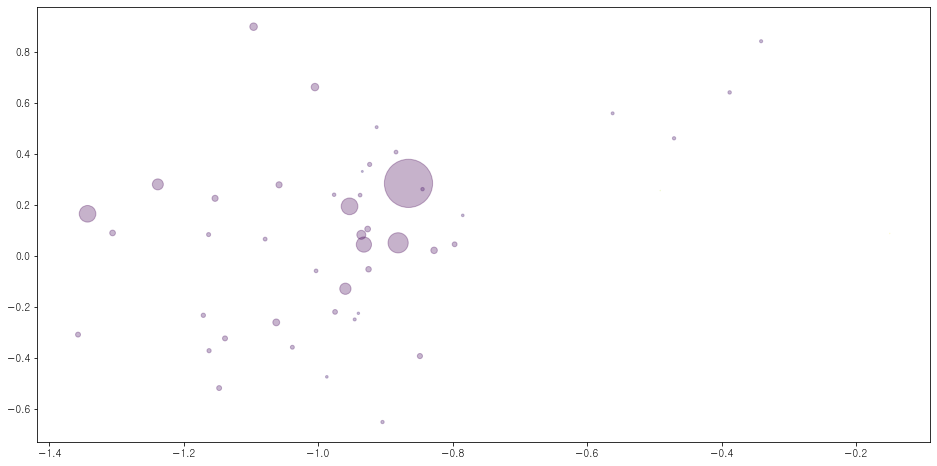

In [ ]:
#top50의 단어를 선별하여 word2vec을 계산하고 좌표로 찍어준다.
font_location = "C:\\Windows\\Fonts\\NGULIM.TTF"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

plt.figure(figsize=(16, 8))
plt.scatter(result[valid_index, 0], result[valid_index, 1] , c = valid_labels , s = areas , alpha=0.3)
# for i, word in zip_index:
#   plt.annotate(word, xy=(result[i, 0], result[i, 1]))
#   # annotate : 실제 word 값
# plt.show()
# => 단어 가까움의 정도가 나타남
# => TF-IDF score와 Word2Vec의 정보를 같이 볼 수 있음

In [ ]:
words_all

['도',
 '컨트리클럽',
 '골프',
 '맛집',
 '도',
 '컨트리클럽',
 '방문',
 '후기',
 '골프',
 '맛집',
 '도',
 '컨트리클럽',
 '방문',
 '후기',
 '안녕하다',
 '항상',
 '행복하다',
 '행복',
 '맛집',
 '이다',
 '도',
 '컨트리클럽',
 '경기',
 '여주시',
 '강천면',
 '부평',
 '리',
 '산',
 '중제',
 '홀',
 '잔디',
 '올해',
 '마지막',
 '골프',
 '를',
 '나다',
 '도',
 '돌다',
 '버리다',
 '도',
 '날씨',
 '쌀쌀하다',
 '티업',
 '추다',
 '않다',
 '전날',
 '괴롭히다',
 '미세먼지',
 '나아지다',
 '즐겁다',
 '라운딩',
 '하다',
 '도',
 '컨트리클럽',
 '자연',
 '경계',
 '완전하다',
 '조화',
 '이루다',
 '하다',
 '동양',
 '사고',
 '바탕',
 '하다',
 '수',
 '화',
 '과',
 '더불다',
 '자연',
 '한눈',
 '들어오다',
 '사방',
 '시야',
 '열다',
 '교감',
 '하다',
 '여유',
 '컨트리클럽',
 '의미',
 '하다',
 '자연',
 '속',
 '즐기다',
 '곳',
 '아니다',
 '그',
 '일부',
 '되어다',
 '일상',
 '여유',
 '즐기다',
 '수',
 '있다',
 '새롭다',
 '차원',
 '컨트리클럽',
 '흙',
 '물의',
 '신성하다',
 '기운',
 '느끼다',
 '아름답다',
 '꽃',
 '즐기다',
 '바람',
 '하다',
 '줌',
 '손',
 '안',
 '담다',
 '내다',
 '있다',
 '여유',
 '주다',
 '도',
 '컨트리클럽',
 '자연',
 '사람',
 '공존',
 '하다',
 '골프클럽',
 '새롭다',
 '패러다임',
 '제시',
 '하다',
 '여주',
 '부평',
 '리',
 '고요한',
 '산줄기',
 '둘러싸다',
 '있다',
 '컨트리클럽',
 '작다',
 '부분',
 '고객',
 '

In [ ]:
result , result.shape

(array([[-1.0645441 , -0.25802487],
        [ 1.389634  , -0.39602664],
        [ 1.310541  , -0.50494784],
        ...,
        [ 1.1702294 , -0.25179642],
        [ 0.7838212 , -0.10117424],
        [ 0.3251506 , -0.44764948]], dtype=float32),
 (14302, 2))

In [ ]:
labels , labels.shape

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), (14302,))

In [ ]:
model.wv.most_similar(positive=["골프"])    #골프과 가장 가까운 단어는?

[('긴급', 0.7394078373908997),
 ('자차', 0.7341420650482178),
 ('박', 0.7263739705085754),
 ('충청도', 0.7224543690681458),
 ('함평', 0.7193310260772705),
 ('업데이트', 0.7141467332839966),
 ('윈체스트', 0.7091378569602966),
 ('해피니스', 0.7071365118026733),
 ('힐데스하임', 0.7027848362922668),
 ('성우', 0.7027021646499634)]

In [ ]:
model.wv.most_similar(positive=["컨트리클럽"])    #컨트리클럽과 가장 가까운 단어는?

[('라지오', 0.6607927083969116),
 ('신생', 0.6575417518615723),
 ('시그너스', 0.6572810411453247),
 ('샴발라', 0.6570979356765747),
 ('쭈팀', 0.6494296789169312),
 ('맛집', 0.62336665391922),
 ('샷감각', 0.6212197542190552),
 ('삿갓', 0.6184000968933105),
 ('가격표', 0.6127293109893799),
 ('서포터즈', 0.6068935394287109)]

In [ ]:
model.wv["강원도"]                            #강원도의 데이터 임베딩

array([-0.15028732, -0.05022184, -0.10901936,  0.14168212,  0.04885107,
        0.09785686, -0.20701605, -0.2621912 , -0.09241355, -0.09982283,
        0.17688246, -0.4564973 ,  0.2390507 , -0.22571863,  0.447938  ,
       -0.48367316,  0.12932532,  0.07781173, -0.2247616 , -0.17092465,
        0.01302366, -0.07525948,  0.01070498, -0.2840559 ,  0.13723315,
       -0.18105292,  0.11839496, -0.2287462 ,  0.18478708,  0.03456667,
        0.21876319, -0.1361189 , -0.22292437,  0.50410557,  0.1396336 ,
       -0.12983139,  0.13285933,  0.07393288, -0.18123007,  0.04930205,
        0.07469862, -0.4359609 ,  0.32215312,  0.2337222 ,  0.17716362,
        0.06660855, -0.3587954 , -0.20384373, -0.17074876, -0.27240962,
       -0.10853153,  0.3562464 , -0.13215528,  0.0784779 ,  0.12377998,
        0.01613995,  0.2652931 , -0.24106534,  0.09570847, -0.09318933,
        0.35761547,  0.17084022,  0.21733908,  0.3713626 ,  0.14694028,
        0.01867276, -0.04775598,  0.42275968, -0.34355727, -0.12

In [ ]:
model.wv.most_similar(positive=["골프","컨트리클럽"] , negative=["강원도"])    #골프 + 컨트리클럽 - 강원도

[('골프장', 0.5603750348091125),
 ('금표', 0.5427234768867493),
 ('크럽', 0.542407214641571),
 ('라운딩', 0.5265942811965942),
 ('샷감각', 0.5224419236183167),
 ('후기', 0.5181974172592163),
 ('영암', 0.5177035927772522),
 ('코스텔', 0.5156348347663879),
 ('순천만', 0.5139690041542053),
 ('다시다', 0.5127667188644409)]

In [ ]:
N = 50
np.random.seed(19680801)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
area

array([441.46292438, 496.51088839, 452.77032021, 289.08043851,
       860.45774138, 449.01802315,  55.31600107,  22.43443725,
       438.10490409, 466.50384179,  59.78897223, 104.98878457,
       844.64837997, 434.10609798, 195.76201007, 444.5511164 ,
       235.7323027 , 776.30447918, 492.53275403, 348.68731558,
       382.06034822, 141.71065251, 265.59813615, 575.85532966,
       468.56411318,  78.51589321,  23.31321882,  38.23895505,
        16.23897859, 207.88306445, 105.58907338, 118.57203503,
       851.91185849,  11.07763646, 135.67410258, 551.87294854,
       851.87617087, 210.14237042, 101.86124416, 289.76792642,
         2.06854952, 136.14481126, 739.24766735,  23.33417734,
       497.67515283, 360.59066052,  94.58341551, 765.70062078,
        50.64874488, 610.99767341])

In [ ]:
s

NameError: name 's' is not defined